# Densest Subgraph Greedy Algorithm

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from latex import latexify, format_axes
from os.path import join
import struct
from array import array
import random
from sklearn.metrics import rand_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
latexify(columns = 2)
df_nodes = pd.read_csv("./facebook_large/musae_facebook_target.csv")
df_edges = pd.read_csv("./facebook_large/musae_facebook_edges.csv")
df_nodes

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


In [4]:
df_edges

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


In [5]:
df_nodes["page_type"].value_counts()

page_type
government    6880
company       6495
politician    5768
tvshow        3327
Name: count, dtype: int64

### Adjacency List of the Graph

In [42]:
from collections import defaultdict
V, E = df_nodes.shape[0], df_edges.shape[0]
Adj = defaultdict(list)
for i in df_edges.index:
    u, v = df_edges.loc[i, "id_1"], df_edges.loc[i, "id_2"]
    Adj[u].append(v)
    Adj[v].append(u)

### $\underset{v \in V}{\operatorname{\sum}} \text{deg}(v) = 2 |E|$

In [7]:
degree_sum = 0
for node in Adj:
    degree_sum += len(Adj[node])
degree_sum

342004

#### $\text{density} = \dfrac{|e(S, \overline{S})|}{|S|}$

In [8]:
def density(Adj):
    E, V = 0, len(Adj)
    for node in Adj:
        E += len(Adj[node])
    return E / (2 * V), E//2, V

#### Finding the Least Degree Vertex

In [9]:
def least_degree_elt(Adj):
    least_degree, idx = float("inf"), -1
    for node in Adj:
        if len(Adj[node]) == 0:
            return least_degree, node
        
        if (len(Adj[node]) < least_degree):
            least_degree = len(Adj[node])
            idx = node
        
    return least_degree, idx

In [10]:
node, id = least_degree_elt(Adj)
print(node, id, Adj[id])

1 0 [18427]


In [11]:
print(density(Adj))

(7.610235870048954, 171002, 22470)


#### Finding the Densest Subgraph using the Greedy Algorithm

In [12]:
def greedy_densest_subgraph(Adj):
    densities, subgraphs, VE = [], [], []
    while (len(Adj) > 1):
        subgraph_density, E, V = density(Adj)
        densities.append(subgraph_density)
        least_degree, id = least_degree_elt(Adj)
        del Adj[id]
        for node in Adj:
            if (id in Adj[node]):
                Adj[node].remove(id)
        subgraphs.append(Adj.copy())
        VE.append(f"{E} / {V}")
    return densities, subgraphs, VE

In [13]:
AdjNew = copy.deepcopy(Adj)
densities, subgraphs, VE = greedy_densest_subgraph(AdjNew)

#### Densities of the SubGraphs obtained by the Greedy Algorithm

In [14]:
print(densities)
print(VE)

[7.610235870048954, 7.610530063643242, 7.610824283425316, 7.611118529398674, 7.611412801566812, 7.61170709993323, 7.6120014245014245, 7.612295775274896, 7.6125901522571455, 7.6128845554516715, 7.613178984861976, 7.613473440491562, 7.613767922343931, 7.614062430422585, 7.614356964731029, 7.614651525272768, 7.614946112051305, 7.615240725070146, 7.615535364332799, 7.615830029842769, 7.616124721603564, 7.616419439618691, 7.616714183891661, 7.617008954425981, 7.617303751225163, 7.617598574292716, 7.617893423632151, 7.618188299246981, 7.618483201140719, 7.618778129316875, 7.619073083778966, 7.619368064530505, 7.619663071575006, 7.619958104915987, 7.620253164556962, 7.620548250501448, 7.620843362752964, 7.621138501315027, 7.621433666191155, 7.621728857384869, 7.622024074899688, 7.622319318739132, 7.622614588906724, 7.622909885405984, 7.623205208240435, 7.6235005574136006, 7.623795932929005, 7.624091334790171, 7.624386763000625, 7.624682217563891, 7.624977698483497, 7.625273205762969, 7.625568

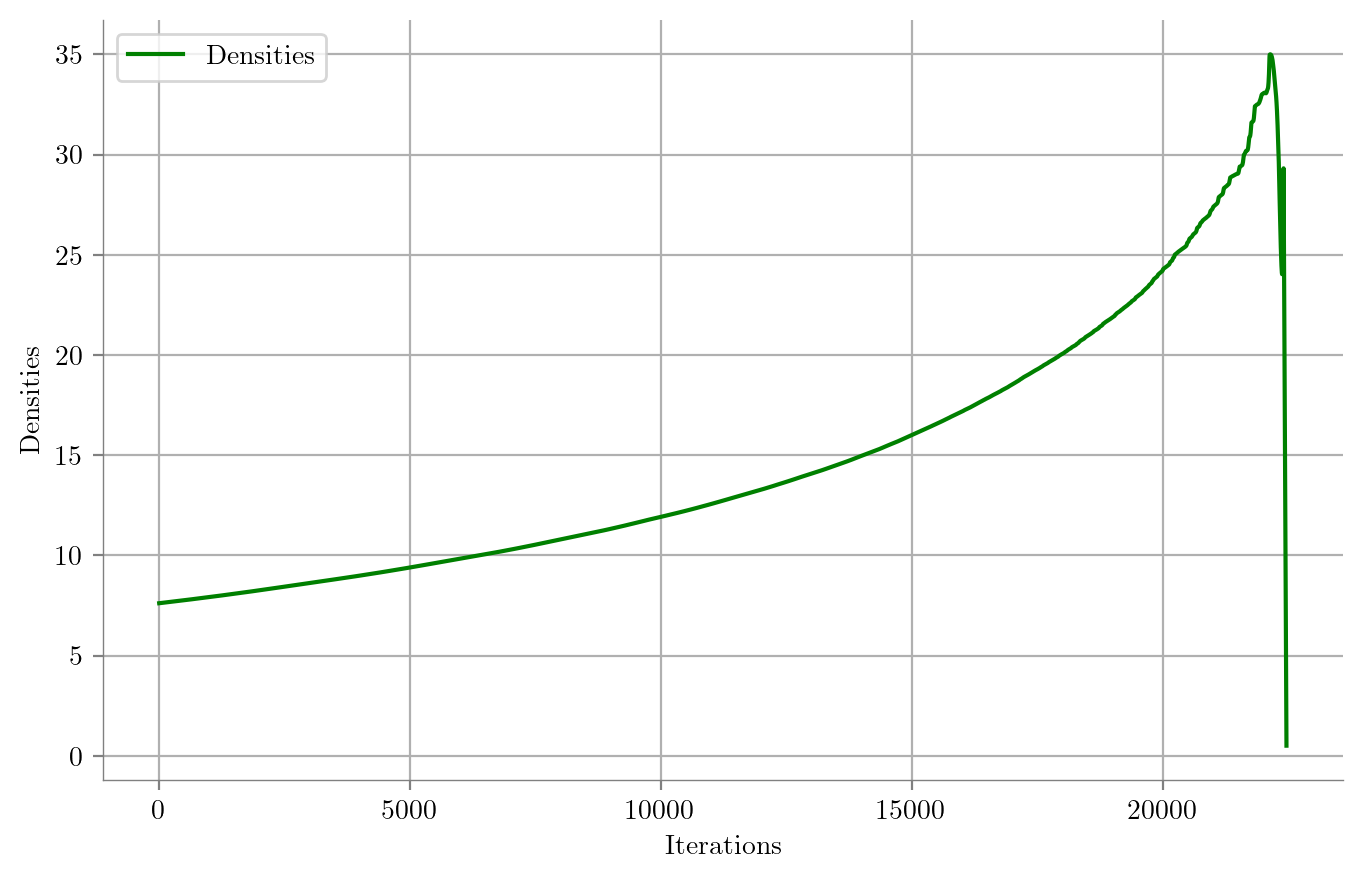

In [15]:
latexify(columns = 2, fig_width = 8)
plt.plot(densities, label = "Densities", color = "green")
plt.xlabel("Iterations")
plt.ylabel("Densities")
plt.legend()
plt.grid()
format_axes(plt.gca())
plt.show()

#### The 10 Densest SubGraphs

In [16]:
densities = np.array(densities)
sorted_idx = np.argsort(densities)[::-1][:10]
print(sorted_idx)
print(densities[sorted_idx])
print(subgraphs[sorted_idx[0]])

[22149 22148 22147 22146 22145 22144 22143 22151 22150 22142]
[35.00623053 35.00621118 35.00619195 35.00617284 35.00615385 35.00613497
 35.00611621 35.0031348  35.003125   35.00304878]
defaultdict(<class 'list'>, {22265: [961, 983, 1271, 1387, 1654, 2442, 2773, 4502, 5432, 5458, 6441, 7467, 8139, 8869, 9125, 9220, 9525, 17726, 11323, 15174, 12408, 20892, 14497, 15236, 17402, 10426, 20276, 18966, 16895, 6045], 10379: [1271, 1387, 1654, 2245, 2284, 2942, 3073, 3097, 11775, 3805, 4097, 4399, 5432, 5458, 6441, 7467, 8139, 9220, 11364, 11432, 22265, 11538, 11804, 12088, 6045, 14497, 14996, 15096, 15174, 10426, 16093, 16122, 16791, 16977, 21729, 19743, 18216, 20700, 19870, 19347], 19743: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 17384, 17984, 21496, 20343], 21729: [754, 961, 983, 1271, 1387, 1654, 2311, 2773

#### Function to Peel off the Densest SubGraph from the given Graph

In [17]:
def peel_off_subgraph(original_adjacency_list, subgraph_adjacency_list):
    new_adjacency_list = {node: copy.deepcopy(neighbors) for node, neighbors in original_adjacency_list.items()}

    for node in subgraph_adjacency_list:
        if node in new_adjacency_list:
            del new_adjacency_list[node]

    updated_adjacency_list = {}
    for node, neighbors in new_adjacency_list.items():
        updated_adjacency_list[node] = [neighbor for neighbor in neighbors if neighbor not in subgraph_adjacency_list]

    return updated_adjacency_list

#### The Graph
![](Graph.png)

#### Densest Subgraph
![](DenseGraph.png)

#### Example Implementation

In [18]:
AdjEx = { 1: [2],
          2: [1, 3, 4, 6, 9],
          3: [2, 5, 6, 9],
          4: [2, 5],
          5: [3, 4, 7],
          6: [2, 3, 7, 9],
          7: [5, 6, 8],
          8: [7],
          9: [2, 3, 6]}

densitiesEx, subgraphsEx, VEEx = greedy_densest_subgraph(AdjEx.copy())
print(f"Densities in each iteration:\n{densitiesEx}")
densitiesEx = np.array(densitiesEx)
print(VEEx)
print("\nThe Subgraphs in each iteration:")
print(subgraphsEx)
print("\nThe Densest Subgraph:")
print(subgraphsEx[np.argmax(densitiesEx)])
print("\nThe Graph after Peeling off the densest subgraph:")
print(peel_off_subgraph(AdjEx.copy(), subgraphsEx[np.argmax(densitiesEx)].copy()))

Densities in each iteration:
[1.4444444444444444, 1.5, 1.5714285714285714, 1.5, 1.4, 1.5, 1.0, 0.5]
['13 / 9', '12 / 8', '11 / 7', '9 / 6', '7 / 5', '6 / 4', '3 / 3', '1 / 2']

The Subgraphs in each iteration:
[{2: [3, 6, 9], 3: [6, 9], 4: [2, 5], 5: [3, 7], 6: [9], 7: [6], 8: [7], 9: []}, {2: [3, 6, 9], 3: [6, 9], 4: [2, 5], 5: [3, 7], 6: [9], 7: [6], 9: []}, {2: [3, 6, 9], 3: [6, 9], 5: [3, 7], 6: [9], 7: [6], 9: []}, {2: [3, 6, 9], 3: [6, 9], 6: [9], 7: [6], 9: []}, {2: [3, 6, 9], 3: [6, 9], 6: [9], 9: []}, {3: [6, 9], 6: [9], 9: []}, {6: [9], 9: []}, {9: []}]

The Densest Subgraph:
{2: [3, 6, 9], 3: [6, 9], 5: [3, 7], 6: [9], 7: [6], 9: []}

The Graph after Peeling off the densest subgraph:
{1: [], 4: [], 8: []}


#### Iteratively we'll find the densest subgraph in the current graph then peel off the densest subgraph from the current graph and find the densest subgraph in the remaining graph, repeating untill 5 such times or untill the remaining graph becomes fully **disconnected**.

In [20]:
max_densities, densest_subgraphs, max_VE = [], [], []
graphs = [Adj]
for i in range(5):
    graphN = copy.deepcopy(graphs[i])
    densitiesN, subgraphsN, VEN = greedy_densest_subgraph(graphN)
    densitiesN = np.array(densitiesN)
    if not len(densitiesN):
        break
    
    max_density, max_density_idx = np.max(densitiesN), np.argmax(densitiesN)
    
    max_densities.append(max_density)
    densest_subgraphs.append(subgraphsN[max_density_idx])
    max_VE.append(VEN[max_density_idx])
    
    graphs.append(peel_off_subgraph(graphs[i].copy(), subgraphsN[max_density_idx].copy()))

#### Densities of the iteratively Peeled Out SubGraphs

In [22]:
print(max_densities)
print(max_VE)
print(densest_subgraphs)
print(len(densest_subgraphs[0]), len(densest_subgraphs[1]), len(densest_subgraphs[2]), len(densest_subgraphs[3]), len(densest_subgraphs[4]))

[35.006230529595015, 25.42222222222222, 20.429378531073446, 16.980392156862745, 15.983935742971887]
['11237 / 321', '2288 / 90', '14464 / 708', '866 / 51', '3980 / 249']
[defaultdict(<class 'list'>, {22265: [961, 983, 1271, 1387, 1654, 2442, 2773, 4502, 5432, 5458, 6441, 7467, 8139, 8869, 9125, 9220, 9525, 17726, 11323, 15174, 12408, 20892, 14497, 15236, 17402, 10426, 20276, 18966, 16895, 6045], 10379: [1271, 1387, 1654, 2245, 2284, 2942, 3073, 3097, 11775, 3805, 4097, 4399, 5432, 5458, 6441, 7467, 8139, 9220, 11364, 11432, 22265, 11538, 11804, 12088, 6045, 14497, 14996, 15096, 15174, 10426, 16093, 16122, 16791, 16977, 21729, 19743, 18216, 20700, 19870, 19347], 19743: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 17384, 17984, 21496, 20343], 21729: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502,

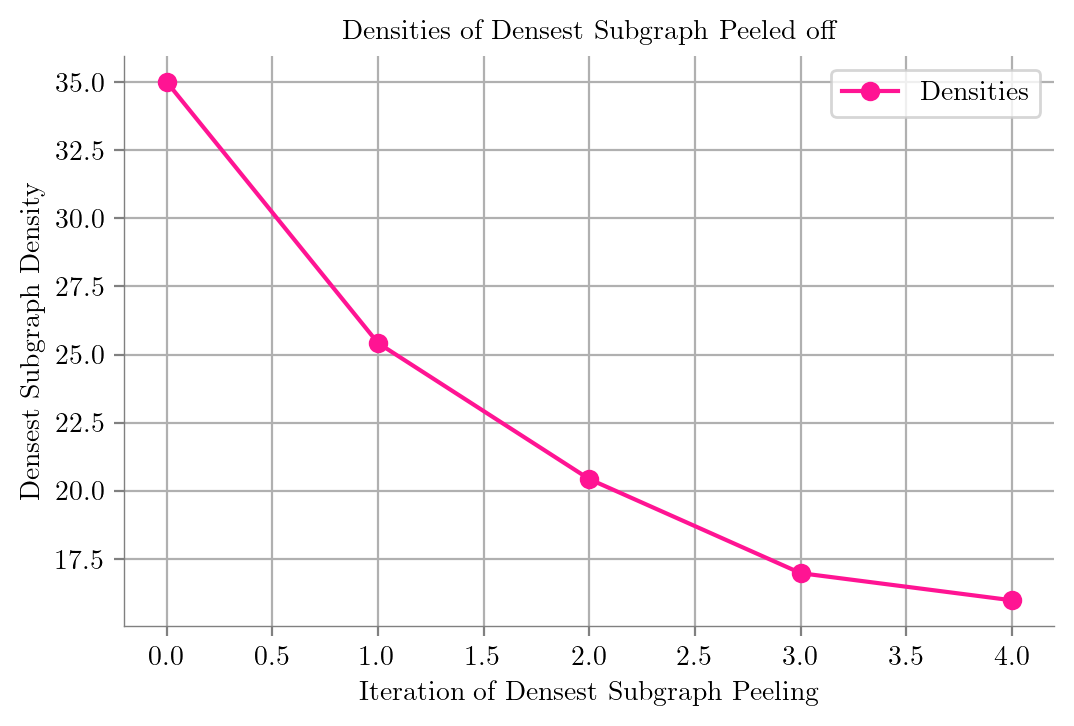

In [24]:
latexify(columns = 2, fig_width = 6)
plt.plot(max_densities, label = "Densities", color = "deeppink", marker = "o")
plt.title(f"Densities of Densest Subgraph Peeled off")
plt.xlabel("Iteration of Densest Subgraph Peeling")
plt.ylabel("Densest Subgraph Density")
plt.legend()
plt.grid()
format_axes(plt.gca())
plt.show()

#### Entropy of these 5 Densest SubGraphs based upon labels - ```df_nodes["page_type"]```

In [25]:
from scipy.special import xlogy
def entropy(probabilities):
    return -np.sum(xlogy(probabilities, probabilities)/np.log(2))

for idx, dsg in enumerate(densest_subgraphs):
    labels = df_nodes["page_type"][dsg.keys()]
    probs = labels.value_counts(normalize = True)
    print(f"Value Counts of the Labels in the Densest Subgraph {idx + 1}:")
    print(labels.value_counts())
    print(f"Entropy of the Densest Subgraph {idx + 1}:")
    print(entropy(probs))
    print()

Value Counts of the Labels in the Densest Subgraph 1:
page_type
government    256
tvshow         60
company         4
Name: count, dtype: int64
Entropy of the Densest Subgraph 1:
0.789386108210765

Value Counts of the Labels in the Densest Subgraph 2:
page_type
government    82
politician     7
Name: count, dtype: int64
Entropy of the Densest Subgraph 2:
0.3974104103699248

Value Counts of the Labels in the Densest Subgraph 3:
page_type
government    470
politician    196
tvshow         38
company         3
Name: count, dtype: int64
Entropy of the Densest Subgraph 3:
1.1648277522702892

Value Counts of the Labels in the Densest Subgraph 4:
page_type
government    50
Name: count, dtype: int64
Entropy of the Densest Subgraph 4:
-0.0

Value Counts of the Labels in the Densest Subgraph 5:
page_type
politician    172
government     76
Name: count, dtype: int64
Entropy of the Densest Subgraph 5:
0.8890349038123859



#### The 5 Densest SubGraphs

In [47]:
print(densest_subgraphs[0])
print(densest_subgraphs[1])
print(densest_subgraphs[2])
print(densest_subgraphs[3])
print(densest_subgraphs[4])

defaultdict(<class 'list'>, {22265: [961, 983, 1271, 1387, 1654, 2442, 2773, 4502, 5432, 5458, 6441, 7467, 8139, 8869, 9125, 9220, 9525, 17726, 11323, 15174, 12408, 20892, 14497, 15236, 17402, 10426, 20276, 18966, 16895, 6045], 10379: [1271, 1387, 1654, 2245, 2284, 2942, 3073, 3097, 11775, 3805, 4097, 4399, 5432, 5458, 6441, 7467, 8139, 9220, 11364, 11432, 22265, 11538, 11804, 12088, 6045, 14497, 14996, 15096, 15174, 10426, 16093, 16122, 16791, 16977, 21729, 19743, 18216, 20700, 19870, 19347], 19743: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 17384, 17984, 21496, 20343], 21729: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 

### Displaying the Graphs!

In [39]:
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

In [114]:
color_lit = {"government" : ["red", "Govt."], "politician" : ["blue", "Pol."], "tvshow" : ["green", "TV"], "company" : ["deeppink", "Comp."]}
def display_graph(adjacency_list, filename):
    G = Network(height = "1080px", width = '100%', directed = False, notebook = True, cdn_resources = "remote")
    
    for node, neighbors in adjacency_list.items():
        G.add_node(str(node), label=str(color_lit[df_nodes["page_type"][node]][1]) + " " + str(node), shape = "dot", color = color_lit[df_nodes["page_type"][node]][0], size = 7, labelHighlightBold = True)

    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(str(node), str(neighbor), color = "#808080", width = 0.2)
    
    G.toggle_physics(False)
    G.toggle_stabilization(True)
    G.barnes_hut()
    G.show(filename)

In [116]:
display_graph(densest_subgraphs[0], "DSG1.html")
display_graph(densest_subgraphs[1], "DSG2.html")
display_graph(densest_subgraphs[2], "DSG3.html")
display_graph(densest_subgraphs[3], "DSG4.html")
display_graph(densest_subgraphs[4], "DSG5.html")

DSG1.html
DSG2.html
DSG3.html
DSG4.html
DSG5.html


### Densest SubGraph 1
![Graph1](1.gif)

### Densest SubGraph 2
![Graph2](2.gif)

### Densest SubGraph 3
![Graph3](3.gif)

### Densest SubGraph 4
![Graph4](4.gif)

### Densest SubGraph 5
![Graph5](5.gif)